# Word2Vec

### Name: Atharv Subhekar
### CWID: 20015840

## Importing Libraries

In [26]:
import numpy as np
from scipy.spatial.distance import cosine
import sklearn
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

## 1. Semantics

In [27]:
def wordsimilarity(word_dict, word, n = 20):
    # list for storing top n words
    top_words = []
    
    # vector of the test word
    word_vec = word_dict[word]
    
    # calculating cosine similarity
    cosinesim = {token: cosine(word_vec, word_dict[token]) for token in word_dict}
    cosinesim = dict(sorted(cosinesim.items(), key = lambda item: item[1]))
    
    # adding similar words to the list
    for word in list(cosinesim.keys())[1:n+1]:
        top_words.append(word)
    
    # printing the results
    print(f"Similar words {word}: ")
    print(top_words)
    
    return top_words

## Visualization

In [30]:
def tsne_func(data, word_dict, annotate = True):
    # initializing TSNE instance
    tsne = TSNE(n_components=2, perplexity = 19)
    
    # lists for storing words and their vectors
    vectors = []
    words = []
    for word in data:
        vectors.append(word_dict[word])
        words.append(word)
    vectors = np.array(vectors)
    
    # obtaining new coordinates using TSNE
    cordinates = tsne.fit_transform(vectors)
    
    # storing x and y coordinates
    x = cordinates[:, 0]
    y = cordinates[:, 1]
    
    # plotting TSNE
    plt.figure(figsize = (10, 5))
    for i in range(vectors.shape[0]):
        plt.scatter(x[i], y[i])
        if annotate == True:
            plt.annotate(words[i],
                        xy=(x[i], y[i]))
                
    plt.show()

## Main Block

Similar words way: 
['mind', 'love', 'kind', 'own', 'lives', 'experience', 'child', 'whose', 'she', 'perhaps', 'brought', 'indeed', 'her', 'once', 'work', 'same', 'true', 'how', 'what', 'way']


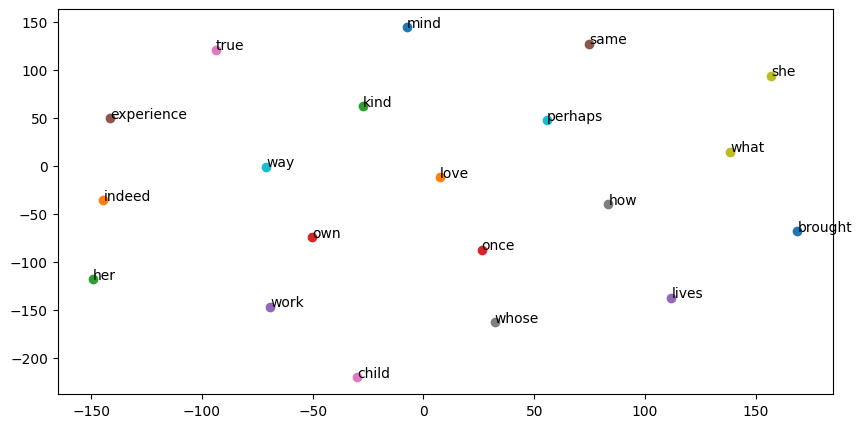

Similar words dealers: 
['markets', 'prices', 'stock', 'buying', 'consumer', 'retail', 'stocks', 'price', 'rise', 'sales', 'business', 'trend', 'industry', 'sector', 'investors', 'demand', 'trading', 'economy', 'higher', 'dealers']


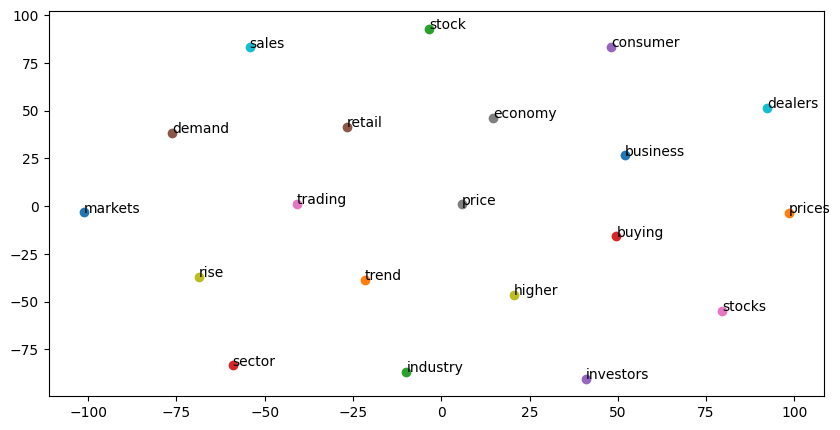

Similar words vanderbilt: 
['ucla', 'harvard', 'yale', 'princeton', 'rutgers', 'university', 'baylor', 'graduate', 'georgetown', 'cornell', 'fordham', 'asu', 'hopkins', 'usc', 'uc', 'usf', 'professor', 'college', 'berkeley', 'vanderbilt']


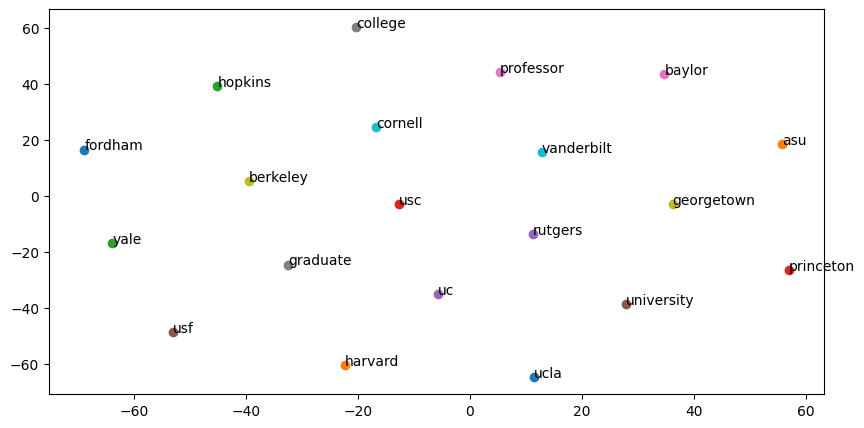

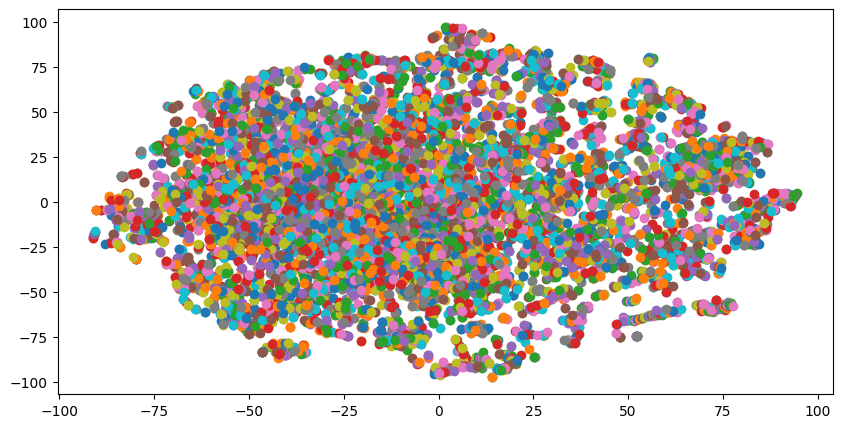

In [32]:
# dictionary for storing words and their vectors
word_dict = {}
# processing the vectors file to extract words and their vectors and storing them in the dictionary
with open("vectors.txt", 'r') as file:
    lines = file.readlines()
    for line in lines:
        line = line.split(" ")
        word_dict[line[0]] = list(map(float, line[1:-1]))

# retrieving similar words and visualizing them
life_words = wordsimilarity(word_dict, "life")
tsne_func(life_words, word_dict)

# retrieving similar words and visualizing them
market_words = wordsimilarity(word_dict, "market")
tsne_func(market_words, word_dict)

# retrieving similar words and visualizing them
stanford_words = wordsimilarity(word_dict, "stanford")
tsne_func(stanford_words, word_dict)

# Using a part of the dataset as plotting all the 400000 points is slow
samples = 10000
word_sub = []
for word in word_dict:
    word_sub.append(word)
    samples -= 1
    if samples == 0:
        break
tsne_func(word_sub, word_dict, annotate = False)
